In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

%matplotlib inline

import os
import pickle
import glob
import numpy as np
import matplotlib.pylab as plt


DATA_DIR = '/Volumes/SAMSUNG_USB/eggs_cnn'

#save_results_dir = './results'





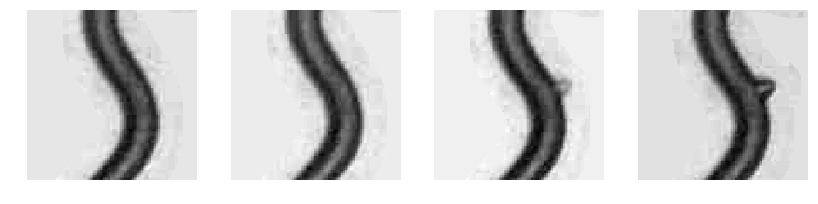

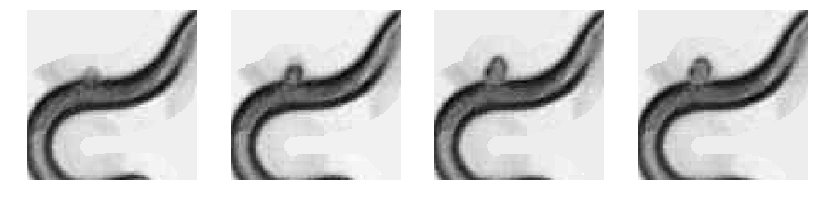

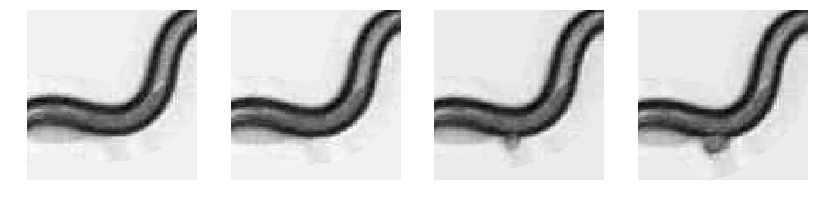

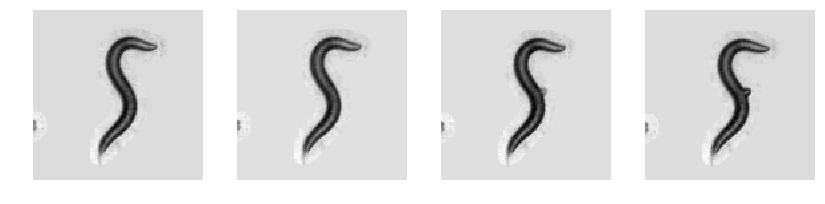

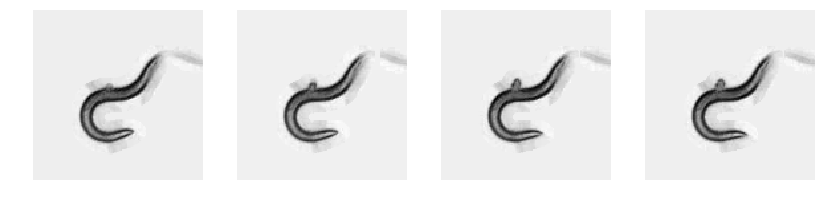

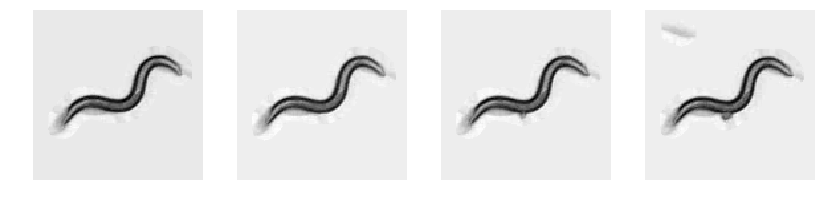

In [52]:
from egg_train_model import read_field_data

save_data_dir = os.path.join(DATA_DIR, 'data')

for prefix in ['samples_eggs_fixed.hdf5', 'samples_eggs_resized.hdf5']:
    fname = os.path.join(save_data_dir, prefix)

    n_rows=9
    data = read_field_data(fname, 'test', tot=n_rows)

    X,Y = data

    X = X[Y[:,1]==1,:,:,:]

    #strt = ['Before', 'Egg Laying', 'After']
    for iseq in range(0, X.shape[0]):
        seq_worm = X[iseq]

        plt.figure()
        seq_size = seq_worm.shape[-1]
        for ii in range(seq_size):
            img = seq_worm[:,:,ii]

            plt.subplot(1, seq_size, ii+1)
            plt.imshow(img, interpolation='none', cmap='gray')
            plt.axis('off')
    

0
1
2


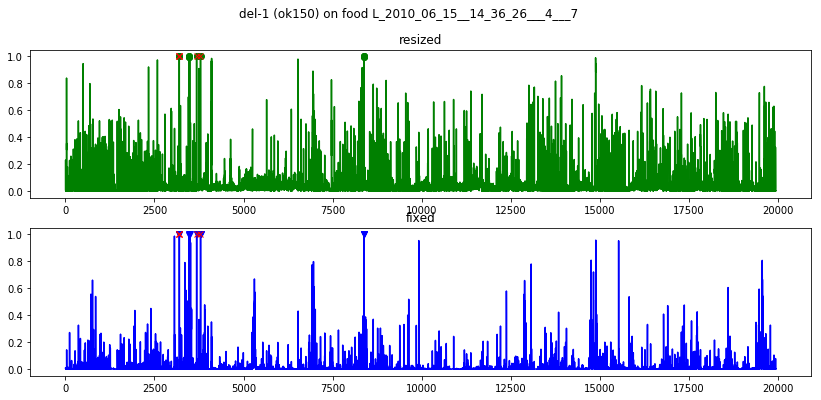

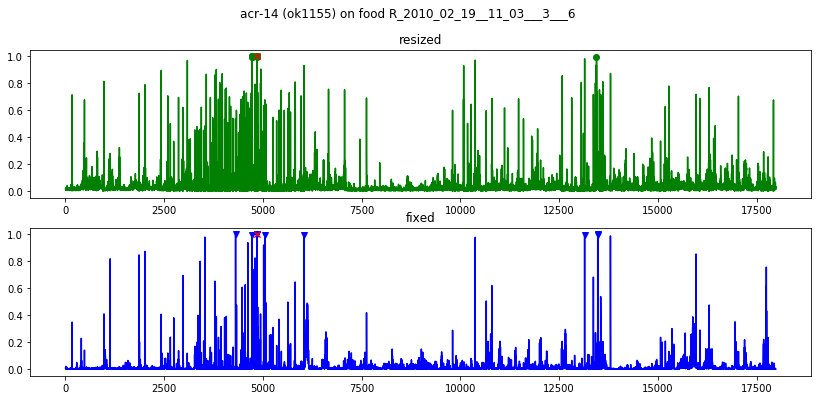

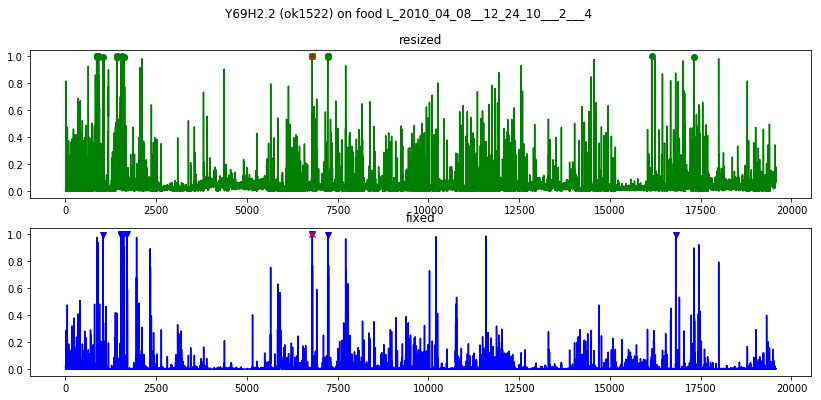

In [54]:
import random


from egg_results import plot_probs

save_results_dir = os.path.join(DATA_DIR, 'results')
files_done = glob.glob(os.path.join(save_results_dir, '*_eggs.p'))

random.seed(2000)
for ii, fname in enumerate(random.sample(files_done, 3)):
    base_name = os.path.basename(fname).replace('_eggs.p', '')
    print(ii, )
    
    results = pickle.load(open(fname, "rb" ))
    
    fig = plt.figure()
    plot_probs(**results)
    fig.set_size_inches(18.5, 5)
    plt.suptitle(base_name)
    if ii >= 2:
        break

#%%
egg_frames = results['eggs']['frame_number'].values

inds_resized = np.where(results['worm_probs_fixed'][:,1]>0.99)[0]
inds_fixed = np.where(results['worm_probs_resized'][:,1]>0.99)[0]